In [54]:
import pandas as pd
df = pd.read_csv ("https://raw.githubusercontent.com/ximedav/Estadistica/refs/heads/main/penguins_size.csv")
df.dropna(inplace = True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [55]:
df.dropna(inplace = True)

In [56]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Modelo ANOVA
modelo = smf.ols("body_mass_g	 ~ C(species)", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
print(tabla_anova)

               df        sum_sq       mean_sq           F        PR(>F)
C(species)    2.0  1.455881e+08  7.279407e+07  343.640884  1.695838e-81
Residual    331.0  7.011633e+07  2.118318e+05         NaN           NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
   Adelie Chinstrap   26.9239 0.9162 -132.1631  186.0108  False
   Adelie    Gentoo 1384.4606    0.0  1250.945 1517.9763   True
Chinstrap    Gentoo 1357.5368    0.0 1193.0646 1522.0089   True
---------------------------------------------------------------


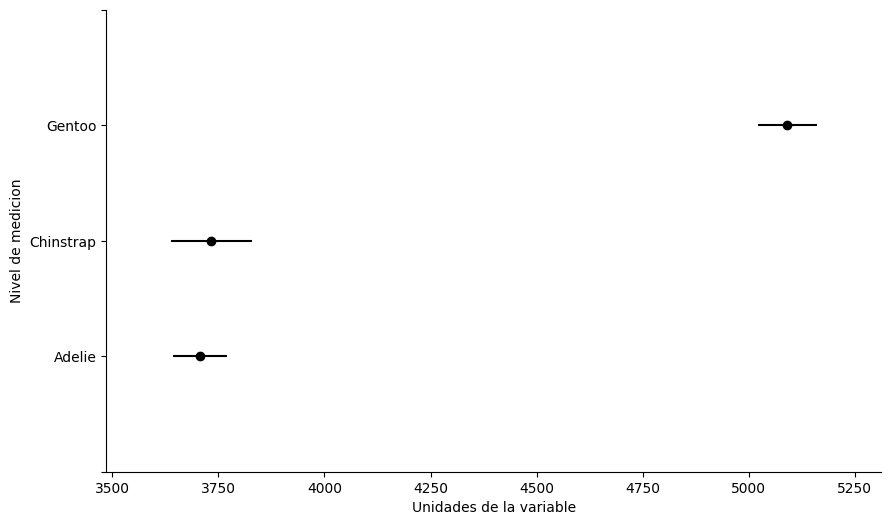

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['body_mass_g'], groups = df['species'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [59]:
niveles = {'Adelie': 2, 'Chinstrap': 3, 'Gentoo': 4}
df['species'] = df['species'].map(niveles)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,2,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,2,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,2,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,4,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,4,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,4,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,4,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('body_mass_g ~ C(island)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(island),2.0,8.416136e+07,4.208068e+07,105.886987,2.831952e-36
Residual,331.0,1.315431e+08,3.974112e+05,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1   group2   meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Biscoe     Dream -1001.2195    0.0 -1178.2505 -824.1885   True
Biscoe Torgersen -1011.6113    0.0 -1257.1689 -766.0538   True
 Dream Torgersen   -10.3918 0.9949  -264.9024  244.1188  False
--------------------------------------------------------------


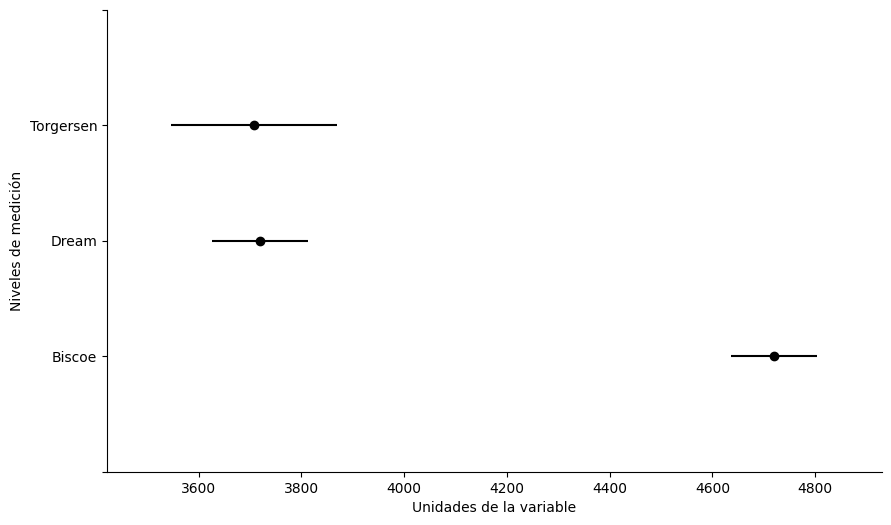

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['body_mass_g'], groups = df['island'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [62]:
niveles = {'Biscoe' : 2, 'Dream' : 3, 'Torgersen': 4}
df['island'] = df['island'].map(niveles)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,4,39.1,18.7,181.0,3750.0,MALE
1,2,4,39.5,17.4,186.0,3800.0,FEMALE
2,2,4,40.3,18.0,195.0,3250.0,FEMALE
4,2,4,36.7,19.3,193.0,3450.0,FEMALE
5,2,4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,4,2,47.2,13.7,214.0,4925.0,FEMALE
340,4,2,46.8,14.3,215.0,4850.0,FEMALE
341,4,2,50.4,15.7,222.0,5750.0,MALE
342,4,2,45.2,14.8,212.0,5200.0,FEMALE


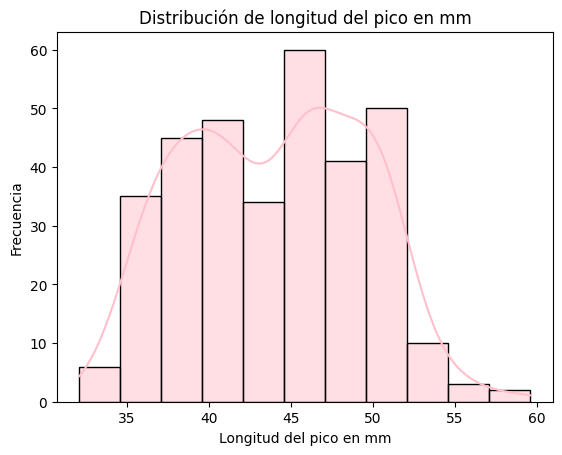

In [63]:
# Histograma Pregnancies
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar con Seaborn
sns.histplot(df['culmen_length_mm'], kde=True, color='pink')

# Etiquetas
plt.xlabel('Longitud del pico en mm')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitud del pico en mm')

plt.show()

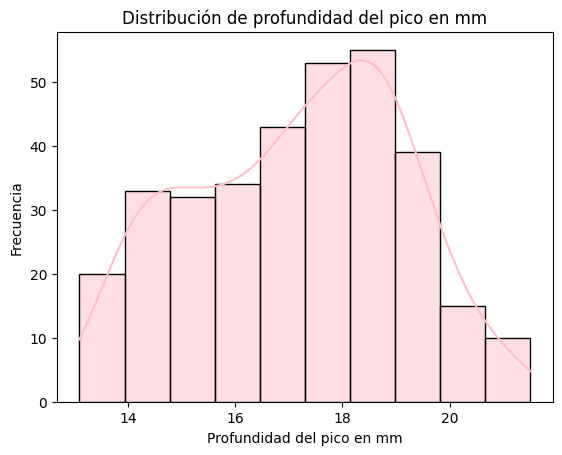

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['culmen_depth_mm'], kde=True, color='pink')

plt.xlabel('Profundidad del pico en mm')
plt.ylabel('Frecuencia')
plt.title('Distribución de profundidad del pico en mm')

plt.show()

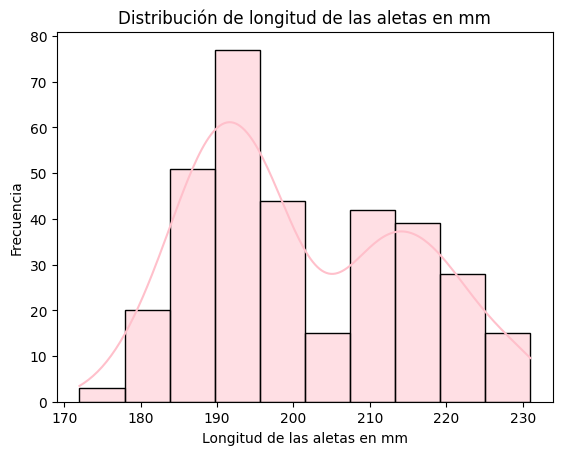

In [65]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['flipper_length_mm'], kde=True, color='pink')

plt.xlabel('Longitud de las aletas en mm')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitud de las aletas en mm')

plt.show()

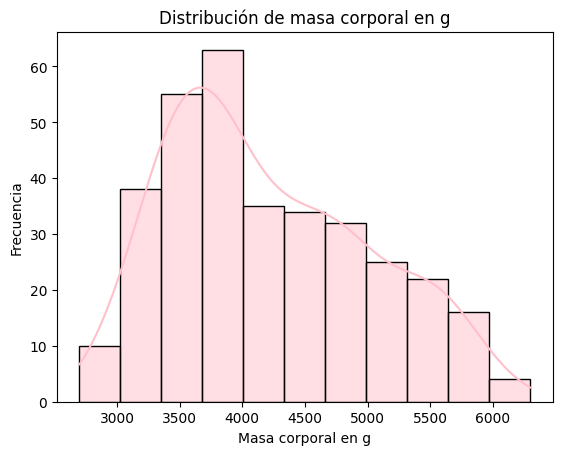

In [66]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['body_mass_g'], kde=True, color='pink')

plt.xlabel('Masa corporal en g')
plt.ylabel('Frecuencia')
plt.title('Distribución de masa corporal en g')

plt.show()

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('body_mass_g ~ C(sex)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova



,df,sum_sq,mean_sq,F,PR(>F)
C(sex),2.0,3.932371e+07,1.966185e+07,36.897865,3.419698e-15
Residual,331.0,1.763808e+08,5.328724e+05,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     . FEMALE -1012.7273 0.3509 -2736.5259  711.0714  False
     .   MALE  -329.3155 0.8945 -2053.0214 1394.3904  False
FEMALE   MALE   683.4118    0.0   495.0469  871.7767   True
-----------------------------------------------------------


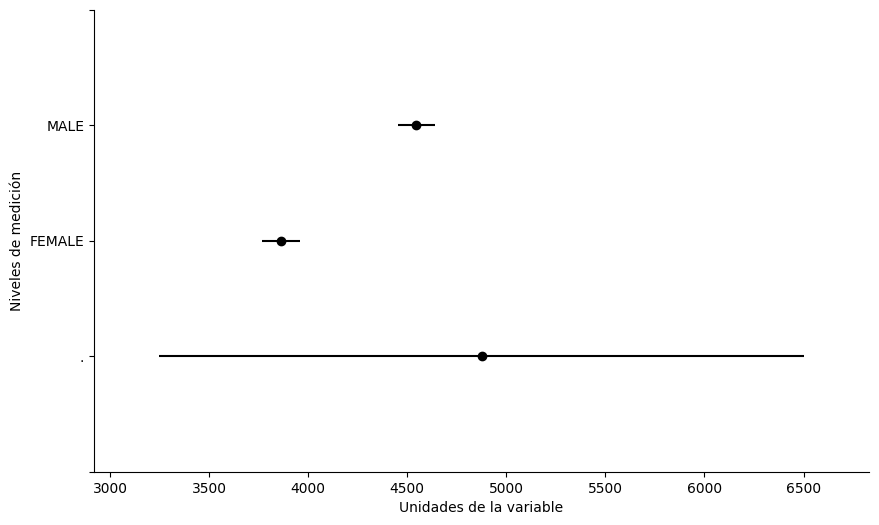

In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['body_mass_g'], groups = df['sex'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [69]:
niveles = {'.' : 0, 'FEMALE' : 1, 'MALE': 2}
df['sex'] = df['sex'].map(niveles)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,4,39.1,18.7,181.0,3750.0,2
1,2,4,39.5,17.4,186.0,3800.0,1
2,2,4,40.3,18.0,195.0,3250.0,1
4,2,4,36.7,19.3,193.0,3450.0,1
5,2,4,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,4,2,47.2,13.7,214.0,4925.0,1
340,4,2,46.8,14.3,215.0,4850.0,1
341,4,2,50.4,15.7,222.0,5750.0,2
342,4,2,45.2,14.8,212.0,5200.0,1


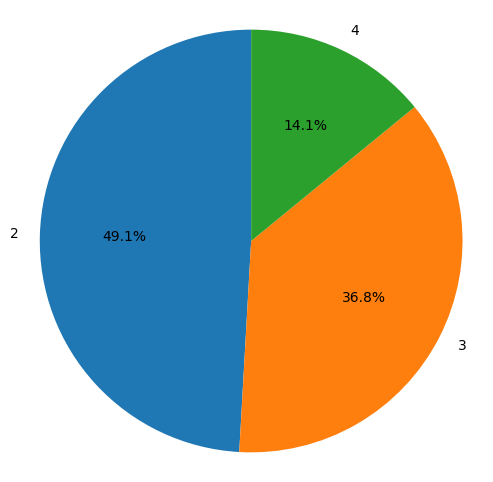

In [71]:
conteo = df['island'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index.map(str), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [72]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,4,39.1,18.7,181.0,3750.0,2
1,2,4,39.5,17.4,186.0,3800.0,1
2,2,4,40.3,18.0,195.0,3250.0,1
4,2,4,36.7,19.3,193.0,3450.0,1
5,2,4,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,4,2,47.2,13.7,214.0,4925.0,1
340,4,2,46.8,14.3,215.0,4850.0,1
341,4,2,50.4,15.7,222.0,5750.0,2
342,4,2,45.2,14.8,212.0,5200.0,1


Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlación')

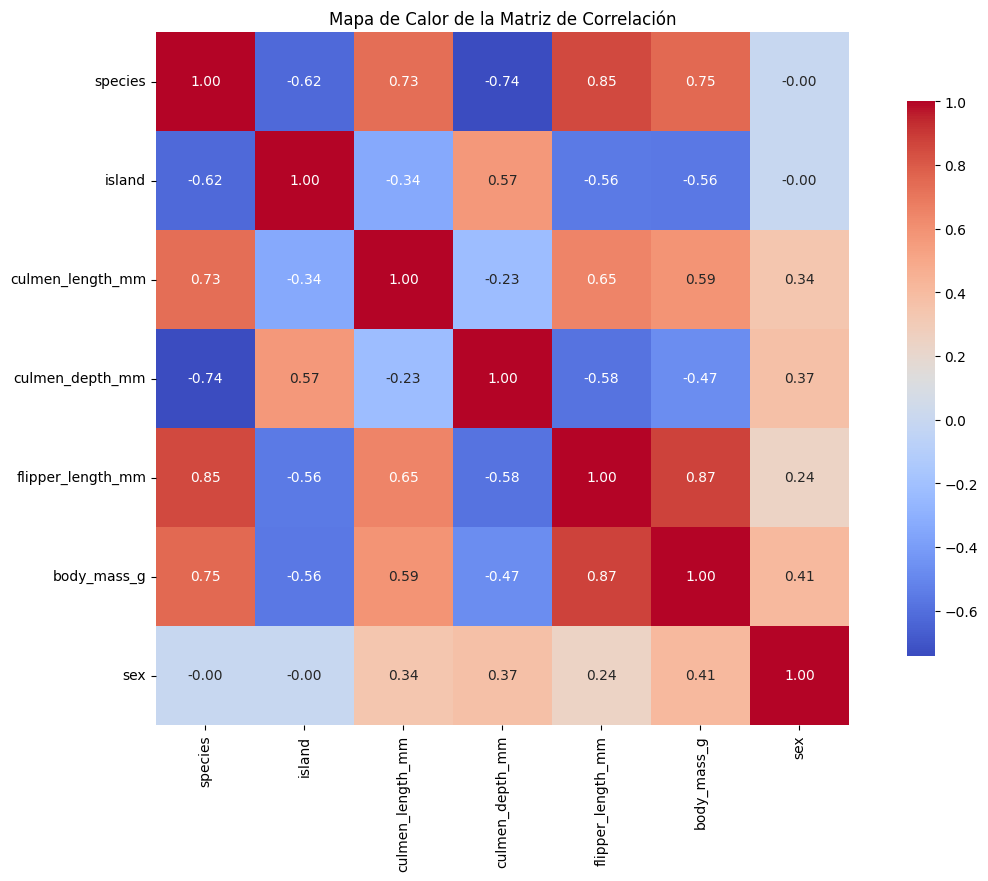

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['body_mass_g',	'species',	'culmen_length_mm',	'culmen_depth_mm',	'flipper_length_mm', 'sex']]
Y = df['island']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predecir
Y_pred = rf.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.79      0.78      0.79        79
           3       0.67      0.80      0.73        61
           4       0.25      0.15      0.19        27

    accuracy                           0.69       167
   macro avg       0.57      0.58      0.57       167
weighted avg       0.66      0.69      0.67       167



In [76]:
from sklearn.ensemble import RandomForestClassifier

importancia = pd.Series(rf.feature_importances_, index=X.columns)
print(importancia.sort_values(ascending=False))

culmen_depth_mm      0.242000
species              0.205744
body_mass_g          0.196260
flipper_length_mm    0.175706
culmen_length_mm     0.163949
sex                  0.016341
dtype: float64


In [77]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
modelo_dtc = DecisionTreeClassifier(random_state=42)
modelo_dtc.fit(X_train, Y_train)

# Predecir
Y_pred = modelo_dtc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.74      0.75      0.74        79
           3       0.70      0.82      0.76        61
           4       0.19      0.11      0.14        27

    accuracy                           0.67       167
   macro avg       0.54      0.56      0.55       167
weighted avg       0.64      0.67      0.65       167



In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo
modelo_gbc = GradientBoostingClassifier(random_state=42)
modelo_gbc.fit(X_train, Y_train)

# Predecir
Y_pred = modelo_gbc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.77      0.77      0.77        79
           3       0.67      0.79      0.72        61
           4       0.25      0.15      0.19        27

    accuracy                           0.68       167
   macro avg       0.56      0.57      0.56       167
weighted avg       0.65      0.68      0.66       167



In [79]:
from sklearn.ensemble import BaggingClassifier

# Crear y entrenar el modelo
modelo_gc = BaggingClassifier(random_state=42)
modelo_gc.fit(X_train, Y_train)

# Predecir
Y_pred = modelo_gc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.74      0.81      0.78        79
           3       0.72      0.70      0.71        61
           4       0.29      0.22      0.25        27

    accuracy                           0.68       167
   macro avg       0.58      0.58      0.58       167
weighted avg       0.66      0.68      0.67       167



In [80]:
from sklearn.ensemble import ExtraTreesClassifier

# Crear y entrenar el modelo
modelo_etc = ExtraTreesClassifier(random_state=42)
modelo_etc.fit(X_train, Y_train)

# Predecir
Y_pred = modelo_etc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.77      0.77      0.77        79
           3       0.64      0.77      0.70        61
           4       0.29      0.15      0.20        27

    accuracy                           0.67       167
   macro avg       0.56      0.56      0.55       167
weighted avg       0.64      0.67      0.65       167



In [81]:
from sklearn.neural_network import MLPClassifier

# Crear el modelo MLP
modelo_nn = MLPClassifier(
    hidden_layer_sizes=(1000,),
    activation='relu',             # Función de activación
    solver='adam',                 # Algoritmo de optimización
    max_iter=1000,                  # Número máximo de épocas
    random_state=42
)

# Entrenar
modelo_nn.fit(X_train, Y_train)

# Predecir
Y_pred = modelo_nn.predict(X_test)

# Evaluar
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.47      1.00      0.64        79
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        27

    accuracy                           0.47       167
   macro avg       0.16      0.33      0.21       167
weighted avg       0.22      0.47      0.30       167



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo
modelo_nb = GaussianNB()

# Entrenar
modelo_nb.fit(X_train, Y_train)

# Predecir
y_pred_nb = modelo_nb.predict(X_test)

# Evaluar
print("Naive Bayes")
print(classification_report(Y_test, y_pred_nb))

Naive Bayes
              precision    recall  f1-score   support

           2       0.98      0.72      0.83        79
           3       1.00      0.56      0.72        61
           4       0.36      1.00      0.53        27

    accuracy                           0.71       167
   macro avg       0.78      0.76      0.69       167
weighted avg       0.89      0.71      0.74       167



In [83]:
from sklearn.naive_bayes import BernoulliNB

# Crear el modelo
modelo_nb_2 = BernoulliNB()

# Entrenar
modelo_nb_2.fit(X_train, Y_train)

# Predecir
y_pred_nb = modelo_nb_2.predict(X_test)

# Evaluar
print("Naive Bayes")
print(classification_report(Y_test, y_pred_nb))

Naive Bayes
              precision    recall  f1-score   support

           2       0.47      1.00      0.64        79
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        27

    accuracy                           0.47       167
   macro avg       0.16      0.33      0.21       167
weighted avg       0.22      0.47      0.30       167



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el valor de k

# Entrenar
modelo_knn.fit(X_train, Y_train)

# Predecir
y_pred_knn = modelo_knn.predict(X_test)

# Evaluar
print("K-Nearest Neighbors")
print(classification_report(Y_test, y_pred_knn))

K-Nearest Neighbors
              precision    recall  f1-score   support

           2       0.74      0.81      0.77        79
           3       0.60      0.77      0.68        61
           4       0.00      0.00      0.00        27

    accuracy                           0.66       167
   macro avg       0.45      0.53      0.48       167
weighted avg       0.57      0.66      0.61       167



In [85]:
from sklearn.svm import SVC

# Crear el modelo SVM multiclase
modelo_svm = SVC(kernel='rbf', decision_function_shape='ovr')  # 'linear', 'poly', 'rbf'

# Entrenar
modelo_svm.fit(X_train, Y_train)

# Predecir
y_pred_svm = modelo_svm.predict(X_test)

# Evaluar
print("SVM")
print(classification_report(Y_test, y_pred_svm))


SVM
              precision    recall  f1-score   support

           2       0.82      0.75      0.78        79
           3       0.57      0.89      0.69        61
           4       0.00      0.00      0.00        27

    accuracy                           0.68       167
   macro avg       0.46      0.54      0.49       167
weighted avg       0.60      0.68      0.62       167



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de regresión logística multiclase
modelo_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
modelo_lr.fit(X_train, Y_train)

y_pred = modelo_lr.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(Y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Reporte de clasificación:
              precision    recall  f1-score   support

           2       0.82      0.77      0.80        79
           3       0.62      0.79      0.70        61
           4       0.31      0.19      0.23        27

    accuracy                           0.68       167
   macro avg       0.59      0.58      0.58       167
weighted avg       0.67      0.68      0.67       167



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
X_test.columns

Index(['body_mass_g', 'species', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'sex'],
      dtype='object')

In [88]:
modelo_lr.predict([[4, 2, 50, 15, 400, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])